# Applying pretrained random forest classifiers
In this notebok we demonstrate how to apply classifiers after they have been trained using [napari-accelerated-pixel-and-object-classifiers](https://github.com/haesleinhuepf/napari-accelerated-pixel-and-object-classification). More examples can be found in the [APOC repository](https://github.com/haesleinhuepf/apoc).

In [1]:
from skimage.io import imread
import pyclesperanto_prototype as cle

import apoc

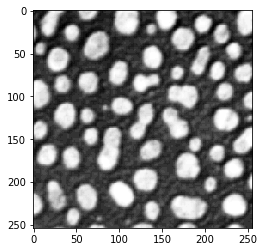

In [2]:
image = imread("blobs.tif")

cle.imshow(image)

## Executing a ObjectSegmenter
And object-segmenter is a pixel classifier that differentiates pixels which are part of objects and those which are part of the background. Afterwards, it runs [connected component labeling](https://en.wikipedia.org/wiki/Connected-component_labeling) under the hood so that its result is a label image.

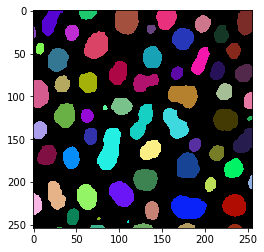

In [3]:
object_segmenter = apoc.ObjectSegmenter('ObjectSegmenter.cl')

label_image = object_segmenter.predict(image)

cle.imshow(label_image, labels=True)

## Executing an ObjectClassifier
The object classifier performs quantitative measurements of intensity, size, shape and distances of object centroids to neighboring object centroids. Using these measurement and a random forest classifier it can differentiate objects, that are for example roundish versus elongated.

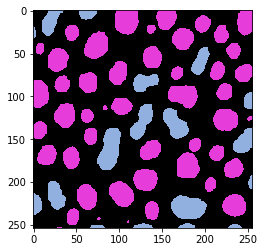

In [4]:
object_classifier = apoc.ObjectClassifier("ObjectClassifier.cl")

class_image = object_classifier.predict(label_image, image)

cle.imshow(class_image, labels=True)